In [1]:
import os
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    nu

In [2]:
os.getcwd()

'/resources/labs/DP0701EN'

In [3]:
df_neig_bar=pd.read_csv('/resources/labs/DP0701EN/Neighborhoods Barcelona.csv')
df_neig_bar.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nacionalitat,Nombre
0,2015,1,Ciutat Vella,1,el Raval,Espanya,1097
1,2015,1,Ciutat Vella,2,el Barri Gòtic,Espanya,521
2,2015,1,Ciutat Vella,3,la Barceloneta,Espanya,457
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Espanya,752
4,2015,2,Eixample,5,el Fort Pienc,Espanya,717


In [4]:
df_neig_bar.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Nacionalitat', 'Nombre'],
      dtype='object')

In [5]:
df_neig_bar.drop(['Any','Nacionalitat','Nombre','Codi_Districte'],axis=1,inplace=True)
df_neig_bar.head()

,Nom_Districte,Codi_Barri,Nom_Barri
0,Ciutat Vella,1,el Raval
1,Ciutat Vella,2,el Barri Gòtic
2,Ciutat Vella,3,la Barceloneta
3,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,5,el Fort Pienc


In [6]:
df_neig_bar.columns=['District','Neighborhood Code','Neighbourhood']
print(df_neig_bar.shape)
df_neig_bar.head(100)

(11396, 3)


,District,Neighborhood Code,Neighbourhood
0,Ciutat Vella,1,el Raval
1,Ciutat Vella,2,el Barri Gòtic
2,Ciutat Vella,3,la Barceloneta
3,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,5,el Fort Pienc
5,Eixample,6,la Sagrada Família
6,Eixample,7,la Dreta de l'Eixample
7,Eixample,8,l'Antiga Esquerra de l'Eixample
8,Eixample,9,la Nova Esquerra de l'Eixample
9,Eixample,10,Sant Antoni


In [7]:
df_neig_bar.drop(df_neig_bar.index[73:11395],inplace=True, axis=0)
print(df_neig_bar.shape)

(74, 3)


Get Barcelona coordinates

In [8]:
#link='https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/DV0101EN/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb'
#requests.get(link, headers = {'User-agent': 'your bot 0.1'})
address ='Barcelona, BCN'
geolocator = Nominatim(user_agent="h_explorer")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude1, longitude1))


The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [9]:
#get coordinates for the neighborhoods of Barcelona
neigh_bar_coord=[]
for name in df_neig_bar['Neighbourhood']:
    address_neig = ('{},Barcelona, BCN'.format(name))
    geolocator = Nominatim(user_agent="h")
    location = geolocator.geocode(address_neig, timeout=10)
    if location == None:
        latitude=0
        longitude=0
    else :
        latitude = location.latitude
        longitude = location.longitude
    neigh_bar_coord.append([name,latitude,longitude])

In [10]:
neig_coord_df = pd.DataFrame(neigh_bar_coord)
neig_coord_df.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude']
print(neig_coord_df.shape)
neig_coord_df.head()

(74, 3)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude
0,el Raval,41.379518,2.168368
1,el Barri Gòtic,41.383395,2.176912
2,la Barceloneta,41.380653,2.189927
3,"Sant Pere, Santa Caterina i la Ribera",0.000000,0.000000
4,el Fort Pienc,41.395925,2.182325


In [11]:
neig_coord_df1=pd.merge(df_neig_bar,neig_coord_df,on='Neighbourhood',how='outer')
print(neig_coord_df1.shape)
neig_coord_df1.head()

(74, 5)


,District,Neighborhood Code,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude
0,Ciutat Vella,1,el Raval,41.379518,2.168368
1,Ciutat Vella,2,el Barri Gòtic,41.383395,2.176912
2,Ciutat Vella,3,la Barceloneta,41.380653,2.189927
3,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0.000000,0.000000
4,Eixample,5,el Fort Pienc,41.395925,2.182325


In [12]:
neig_coord_df1=neig_coord_df1.drop(neig_coord_df1[neig_coord_df1['Neighbourhood Latitude']==0].index)
print(neig_coord_df1.shape)

(71, 5)


In [13]:
neig_coord_df1.drop('Neighborhood Code',axis=1,inplace=True)
neig_coord_df1.head()

,District,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude
0,Ciutat Vella,el Raval,41.379518,2.168368
1,Ciutat Vella,el Barri Gòtic,41.383395,2.176912
2,Ciutat Vella,la Barceloneta,41.380653,2.189927
4,Eixample,el Fort Pienc,41.395925,2.182325
5,Eixample,la Sagrada Família,41.403479,2.174410


In [14]:
df_flat_rent=pd.read_csv('/resources/labs/DP0701EN/2017_lloguer_preu_trim.csv')

In [15]:
print(df_flat_rent.shape)
print(df_flat_rent.columns)

(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')


In [16]:
df_flat_rent.drop(['Any','Trimestre','Codi_Districte','Codi_Barri','Nom_Districte'],inplace=True,axis=1)
df_flat_rent.head()

,Nom_Barri,Lloguer_mitja,Preu
0,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [17]:
df_flat_rent['Lloguer_mitja'].unique()


array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [18]:
df_flat_rent.drop((df_flat_rent[df_flat_rent['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)'].index),inplace=True,axis=0)
df_flat_rent.shape

(292, 3)

In [19]:
df_flat_rent=df_flat_rent.groupby(df_flat_rent['Nom_Barri']).mean()
df_flat_rent.reset_index(inplace=True)
df_flat_rent.columns=['Neighbourhood','Price (€/month)']
df_flat_rent.dropna(inplace=True)
df_flat_rent['Price (€/month)'] = df_flat_rent['Price (€/month)'].astype(int)
print(df_flat_rent.shape)
df_flat_rent.head()

(70, 2)


,Neighbourhood,Price (€/month)
1,Can Baró,684
2,Can Peguera,407
3,Canyelles,681
4,Ciutat Meridiana,435
5,Diagonal Mar i el Front Marítim del Poblenou,1109


In [20]:
CLIENT_ID = 'FFFT5X3P0GB5WUVYEAJHMUDK31TBVTRRC4EFNG2AY25WHHA3' 
CLIENT_SECRET = 'SIR1KEBIXUNZMUTEYHVPU2SOV5CWUSROQB0RHQQ4PUFU0VMU' 
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FFFT5X3P0GB5WUVYEAJHMUDK31TBVTRRC4EFNG2AY25WHHA3
CLIENT_SECRET:SIR1KEBIXUNZMUTEYHVPU2SOV5CWUSROQB0RHQQ4PUFU0VMU


In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        LIMIT=100
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [23]:
LIMIT=100
lat=41.3828939
lng=2.1774322
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
results = requests.get(url).json()
#results

In [24]:
barcelona_venues=getNearbyVenues(names=neig_coord_df1['Neighbourhood'],
                               latitudes=neig_coord_df1['Neighbourhood Latitude'],
                               longitudes=neig_coord_df1['Neighbourhood Longitude'])

In [25]:
print(barcelona_venues.shape)
barcelona_venues.head()

(2919, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,el Raval,41.379518,2.168368,Cera 23,41.378947,2.166180,Spanish Restaurant
1,el Raval,41.379518,2.168368,Arume,41.378953,2.166008,Spanish Restaurant
2,el Raval,41.379518,2.168368,A Tu Bola,41.380096,2.169054,Tapas Restaurant
3,el Raval,41.379518,2.168368,Chulapio,41.379264,2.165905,Cocktail Bar
4,el Raval,41.379518,2.168368,La Monroe,41.378795,2.170692,Spanish Restaurant


In [26]:
barcelona_venues['Venue Category'].nunique()

274

In [27]:
n = 10
barcelona_venues['Venue Category'].value_counts()[:n]
#.index.tolist()

Spanish Restaurant          154
Tapas Restaurant            151
Mediterranean Restaurant    132
Café                        120
Restaurant                  115
Hotel                       113
Bar                         104
Pizza Place                  85
Bakery                       77
Plaza                        73
Name: Venue Category, dtype: int64

In [28]:
barcelona_venues_onehot=pd.get_dummies(barcelona_venues[['Venue Category']],prefix="",prefix_sep="")
#Add neighbourhood column
barcelona_venues_onehot['Neighbourhood']=barcelona_venues['Neighborhood']
barcelona_venues_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
col1=[barcelona_venues_onehot.columns[-1]]+list(barcelona_venues_onehot.columns[:-1])
barcelona_venues_onehot=barcelona_venues_onehot[col1]
barcelona_venues_onehot.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
barcelona_venues_onehot_group=barcelona_venues_onehot.groupby(barcelona_venues_onehot['Neighbourhood']).mean().reset_index()
print(barcelona_venues_onehot_group.shape)

(71, 275)


In [31]:
barcelona_venues_onehot_group.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Baró de Viver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted___ = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted___['Neighbourhood'] = barcelona_venues_onehot_group['Neighbourhood']

for ind in np.arange(barcelona_venues_onehot_group.shape[0]):
    neighborhoods_venues_sorted___.iloc[ind, 1:] = return_most_common_venues(barcelona_venues_onehot_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted___.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baró de Viver,Park,Dessert Shop,Toy / Game Store,Asian Restaurant,Restaurant,Supermarket,Pet Store,Food,Deli / Bodega,Furniture / Home Store
1,Can Baró,Spanish Restaurant,Grocery Store,Breakfast Spot,Pool,Dessert Shop,Park,Chinese Restaurant,Scenic Lookout,Café,Big Box Store
2,Can Peguera,Park,Bar,Restaurant,Supermarket,Tapas Restaurant,German Restaurant,Food Court,Grocery Store,Food & Drink Shop,Plaza
3,Canyelles,Restaurant,BBQ Joint,Soccer Stadium,Pizza Place,Mediterranean Restaurant,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
4,Ciutat Meridiana,Metro Station,Grocery Store,Plaza,Mediterranean Restaurant,Supermarket,Park,Filipino Restaurant,Exhibit,Falafel Restaurant,Farmers Market


In [34]:
# set number of clusters
kclusters = 5

barcelona_grouped_clustering = barcelona_venues_onehot_group.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 3, 4, 3, 0, 0, 3, 3], dtype=int32)

In [35]:
# add clustering labels
neighborhoods_venues_sorted___.insert(0, 'Cluster Labels', kmeans.labels_)

barcelona_merged = neig_coord_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
barcelona_merged = barcelona_merged.join(neighborhoods_venues_sorted___.set_index('Neighbourhood'), on='Neighbourhood')

barcelona_merged.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,el Raval,41.379518,2.168368,0.0,Cocktail Bar,Bar,Spanish Restaurant,Tapas Restaurant,Restaurant,Pizza Place,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Theater
1,el Barri Gòtic,41.383395,2.176912,0.0,Plaza,Tapas Restaurant,Hotel,Cocktail Bar,Spanish Restaurant,Bar,Pizza Place,Ice Cream Shop,Wine Bar,Japanese Restaurant
2,la Barceloneta,41.380653,2.189927,0.0,Tapas Restaurant,Bar,Mediterranean Restaurant,Paella Restaurant,Spanish Restaurant,Seafood Restaurant,Ice Cream Shop,Restaurant,Pizza Place,Burger Joint
3,"Sant Pere, Santa Caterina i la Ribera",0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,el Fort Pienc,41.395925,2.182325,3.0,Coffee Shop,Chinese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Mexican Restaurant,Yoga Studio,Smoke Shop,Supermarket,Bistro


In [36]:
barcelona_merged.dropna(axis=0,inplace=True)
barcelona_merged['Cluster Labels'] = barcelona_merged['Cluster Labels'].astype(int)
barcelona_merged.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,el Raval,41.379518,2.168368,0,Cocktail Bar,Bar,Spanish Restaurant,Tapas Restaurant,Restaurant,Pizza Place,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Theater
1,el Barri Gòtic,41.383395,2.176912,0,Plaza,Tapas Restaurant,Hotel,Cocktail Bar,Spanish Restaurant,Bar,Pizza Place,Ice Cream Shop,Wine Bar,Japanese Restaurant
2,la Barceloneta,41.380653,2.189927,0,Tapas Restaurant,Bar,Mediterranean Restaurant,Paella Restaurant,Spanish Restaurant,Seafood Restaurant,Ice Cream Shop,Restaurant,Pizza Place,Burger Joint
4,el Fort Pienc,41.395925,2.182325,3,Coffee Shop,Chinese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Mexican Restaurant,Yoga Studio,Smoke Shop,Supermarket,Bistro
5,la Sagrada Família,41.403479,2.174410,0,Restaurant,Café,Bakery,Mexican Restaurant,Hotel,Plaza,Coffee Shop,Burger Joint,Sandwich Place,Pizza Place


In [37]:
!wget --quiet https://raw.githubusercontent.com/martgnz/bcn-geodata/master/barris/barris.geojson -O barcelona_neighbourhoods.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [38]:
barcelona_geo = r'barcelona_neighbourhoods.json'

In [39]:
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Neighbourhood Latitude'], barcelona_merged['Neighbourhood Longitude'], barcelona_merged['Neighbourhood'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=5).add_to(map_clusters)

# add neighbourhood rent prices 

map_clusters.choropleth(
    geo_data=barcelona_geo,
    data=df_flat_rent,
    columns=['Neighbourhood','Price (€/month)'],
    key_on='feature.properties.NOM',
    fill_color='OrRd', 
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Price (€/month)'
)

map_clusters

## Analizing Clusters

### Cluster 1

In [40]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 0, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,el Raval,Cocktail Bar,Bar,Spanish Restaurant,Tapas Restaurant,Restaurant,Pizza Place,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Theater
1,el Barri Gòtic,Plaza,Tapas Restaurant,Hotel,Cocktail Bar,Spanish Restaurant,Bar,Pizza Place,Ice Cream Shop,Wine Bar,Japanese Restaurant
2,la Barceloneta,Tapas Restaurant,Bar,Mediterranean Restaurant,Paella Restaurant,Spanish Restaurant,Seafood Restaurant,Ice Cream Shop,Restaurant,Pizza Place,Burger Joint
5,la Sagrada Família,Restaurant,Café,Bakery,Mexican Restaurant,Hotel,Plaza,Coffee Shop,Burger Joint,Sandwich Place,Pizza Place
6,la Dreta de l'Eixample,Hotel,Mediterranean Restaurant,Boutique,Restaurant,Tapas Restaurant,Café,Hostel,Spanish Restaurant,Japanese Restaurant,Bakery
7,l'Antiga Esquerra de l'Eixample,Hotel,Tapas Restaurant,Spanish Restaurant,Cocktail Bar,Japanese Restaurant,Mediterranean Restaurant,Beer Bar,Sandwich Place,Café,Hostel
8,la Nova Esquerra de l'Eixample,Café,Japanese Restaurant,Mediterranean Restaurant,Hotel,Brewery,Bar,Tapas Restaurant,Gym,Indian Restaurant,Nightclub
9,Sant Antoni,Mediterranean Restaurant,Bar,Hotel,Tapas Restaurant,Café,Italian Restaurant,Coffee Shop,Spanish Restaurant,Pizza Place,Burger Joint
10,el Poble Sec,Tapas Restaurant,Mediterranean Restaurant,Bar,Pizza Place,Café,Cocktail Bar,Italian Restaurant,Spanish Restaurant,Hotel,Coffee Shop
13,la Font de la Guatlla,Spanish Restaurant,Plaza,Pizza Place,Tapas Restaurant,Supermarket,Bookstore,Restaurant,Nightclub,Mediterranean Restaurant,Gay Bar


### Cluster 2

In [41]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 1, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,el Coll,Restaurant,Yoga Studio,Fish Market,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market


### Cluster 3

In [42]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 2, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Torre Baró,Scenic Lookout,Fish & Chips Shop,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,French Restaurant


### Cluster 4

In [43]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 3, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,el Fort Pienc,Coffee Shop,Chinese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Mexican Restaurant,Yoga Studio,Smoke Shop,Supermarket,Bistro
11,la Marina del Prat Vermell,Spanish Restaurant,Furniture / Home Store,Supermarket,Automotive Shop,Food,Mediterranean Restaurant,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant
12,la Marina de Port,Spanish Restaurant,Café,Hotel,Mediterranean Restaurant,Chinese Restaurant,Plaza,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Farmers Market
18,les Corts,Spanish Restaurant,Restaurant,Hotel,Café,Grocery Store,Mediterranean Restaurant,Burger Joint,Sandwich Place,Cocktail Bar,Coffee Shop
19,la Maternitat i Sant Ramon,Gym / Fitness Center,Soccer Field,Nightclub,Tram Station,Sporting Goods Shop,Sandwich Place,Metro Station,Bowling Alley,Basketball Stadium,Sports Club
20,Pedralbes,Park,Plaza,Garden,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Bus Stop,Café,Palace,College Cafeteria
24,Sant Gervasi - la Bonanova,Planetarium,Coffee Shop,Science Museum,Mediterranean Restaurant,Plaza,Exhibit,Park,Bakery,Restaurant,Buffet
33,Can Baró,Spanish Restaurant,Grocery Store,Breakfast Spot,Pool,Dessert Shop,Park,Chinese Restaurant,Scenic Lookout,Café,Big Box Store
35,la Font d'en Fargues,Coffee Shop,Spanish Restaurant,Supermarket,Pizza Place,Gym / Fitness Center,Restaurant,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farmers Market
37,la Teixonera,Spanish Restaurant,Bus Station,Metro Station,Grocery Store,Bakery,Soccer Field,Café,Tapas Restaurant,Mediterranean Restaurant,Farmers Market


### Cluster 5

In [44]:
barcelona_merged.loc[barcelona_merged['Cluster Labels'] == 4, barcelona_merged.columns[[0] + list(range(4, barcelona_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,el Carmel,Plaza,Food Court,Supermarket,Gym,Coffee Shop,Café,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farmers Market
47,la Guineueta,Grocery Store,Plaza,Seafood Restaurant,Breakfast Spot,Food Court,South American Restaurant,Spanish Restaurant,Pizza Place,Supermarket,Metro Station
49,les Roquetes,Gym,Diner,Music Venue,Castle,Gym Pool,Falafel Restaurant,Metro Station,Grocery Store,Plaza,Flea Market
52,la Trinitat Nova,Grocery Store,Music Venue,Park,Metro Station,Pharmacy,Spanish Restaurant,Breakfast Spot,Food & Drink Shop,Food,Flower Shop
54,Ciutat Meridiana,Metro Station,Grocery Store,Plaza,Mediterranean Restaurant,Supermarket,Park,Filipino Restaurant,Exhibit,Falafel Restaurant,Farmers Market
72,la Verneda i la Pau,Grocery Store,Bakery,Coffee Shop,Plaza,Hardware Store,Food,Falafel Restaurant,Café,Veterinarian,Supermarket


## Statistical Analysis 

In [45]:
df_flat_rent.sort_values(by=['Price (€/month)'],ascending=False, inplace=True)
df_flat_rent_top= df_flat_rent.head(10)
df_flat_rent_top

,Neighbourhood,Price (€/month)
10,Pedralbes,1785
72,les Tres Torres,1627
22,Sarrià,1353
16,Sant Gervasi - Galvany,1312
68,la Vila Olímpica del Poblenou,1248
17,Sant Gervasi - la Bonanova,1235
26,"Vallvidrera, el Tibidabo i les Planes",1231
51,la Dreta de l'Eixample,1193
5,Diagonal Mar i el Front Marítim del Poblenou,1109
47,l'Antiga Esquerra de l'Eixample,1056


In [46]:
df_flat_rent.sort_values(by=['Price (€/month)'],ascending=True, inplace=True)
df_flat_rent_last= df_flat_rent.head(10)
df_flat_rent_last

,Neighbourhood,Price (€/month)
24,Vallbona,302
2,Can Peguera,407
4,Ciutat Meridiana,435
23,Torre Baró,443
65,la Trinitat Vella,500
71,les Roquetes,534
64,la Trinitat Nova,540
27,Verdun,592
35,el Carmel,603
31,el Besòs i el Maresme,610


In [47]:
# create map
df_flat_rent_top_map = folium.Map(location=[latitude1, longitude1], zoom_start=12)

# add neighbourhood rent prices 

df_flat_rent_top_map.choropleth(
    geo_data=barcelona_geo,
    data=df_flat_rent_top,
    columns=['Neighbourhood','Price (€/month)'],
    key_on='feature.properties.NOM',
    fill_color='OrRd', 
    fill_opacity=0.6, 
    line_opacity=0.3,
    legend_name='Price (€/month)'
)

df_flat_rent_top_map

In [48]:
df_flat_rent.describe()

,Price (€/month)
count,70.000000
mean,817.385714
std,259.010396
min,302.000000
25%,674.250000
50%,765.500000
75%,909.750000
max,1785.000000


In [49]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

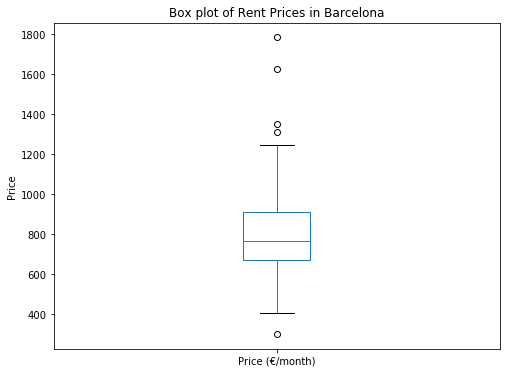

In [50]:
df_flat_rent.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Rent Prices in Barcelona')
plt.ylabel('Price')

plt.show()

In [51]:
barcelona_count_top10_list=barcelona_venues['Venue Category'].value_counts()[:10]
barcelona_count_top10=pd.DataFrame(barcelona_count_top10_list)
barcelona_count_top10.reset_index(inplace=True)
barcelona_count_top10.columns= ['Venue','Venue Category']
barcelona_count_top10.head(10)

,Venue,Venue Category
0,Spanish Restaurant,154
1,Tapas Restaurant,151
2,Mediterranean Restaurant,132
3,Café,120
4,Restaurant,115
5,Hotel,113
6,Bar,104
7,Pizza Place,85
8,Bakery,77
9,Plaza,73


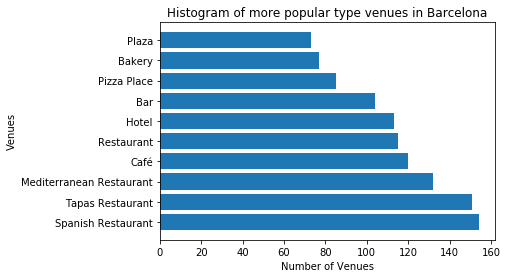

In [52]:
#barcelona_count_top10.plot(kind='bar', figsize=(8, 5))
plt.barh(barcelona_count_top10['Venue'],barcelona_count_top10['Venue Category'],align='center')
plt.title('Histogram of more popular type venues in Barcelona') 
plt.ylabel('Venues') 
plt.xlabel('Number of Venues') 
plt.show()